In [63]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = np.arange(10).reshape((-1,1))
y = np.array([0,0,0,0,1,1,1,1,1,1])
X,y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [14]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [18]:
model.predict_proba(X)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [16]:
model.intercept_, model.coef_

(array([-1.04608067]), array([[0.51491375]]))

In [24]:
confusion_matrix(y, model.predict(X))

array([[3, 1],
       [0, 6]], dtype=int64)

In [26]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [53]:
X, y = load_digits(return_X_y=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [57]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [58]:
X_test = scaler.transform(X_test)

In [59]:
y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.964509394572025
0.9416666666666667


<AxesSubplot:>

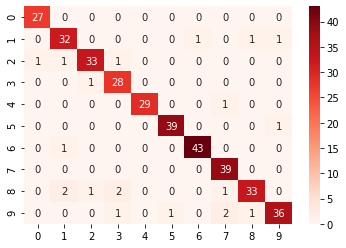

In [76]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='Reds', annot=True)